In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import re

from sklearn.model_selection import train_test_split

In [ ]:
!wget https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv
!wget https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv

--2022-04-08 12:19:24--  https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv
Resolving ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)... 52.218.84.19
Connecting to ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)|52.218.84.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93472103 (89M) [text/csv]
Saving to: ‘webis_train.csv’

webis_train.csv     100%[===================>]  89.14M  26.4MB/s    in 3.4s    

2022-04-08 12:19:28 (26.4 MB/s) - ‘webis_train.csv’ saved [93472103/93472103]

--2022-04-08 12:19:28--  https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv
Resolving ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)... 52.218.106.136
Connecting to ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)|52.218.106.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9

In [ ]:
# Load data
train_data = pd.read_csv('webis_train.csv')
test_data = pd.read_csv('webis_test.csv')

# Get the fields we are going to use
train_data = train_data[["postText", "truthClass"]]
test_data = test_data[["postText", "truthClass"]]

In [ ]:
# Number of entries
print(f"Number of train entries: {len(train_data)}")
print(f"Number of test entries: {len(test_data)}\n")

# Show samples
print("Train samples:")
print(f"{train_data.head()}\n")
print("Test samples:")
print(f"{test_data.head()}\n")

# Check for invalid entries and drop them
print(f"Train dataset invalid entries: {train_data['postText'].isnull().sum()}")
train_data = train_data[train_data['postText'].notna()]
print(f"Test dataset invalid entries: {test_data['postText'].isnull().sum()}\n")
test_data = test_data[test_data['postText'].notna()]

# Check for duplicates (uncased) and drop them
# train
train_lower = train_data.copy()
train_lower["postText"] = train_lower["postText"].apply(lambda x: x.lower())
dupes = train_lower["postText"].duplicated()
print(f"Number of train duplicates {len(dupes[dupes == True])}")
train_data.drop(dupes[dupes == True].index, inplace=True)
# test
test_lower = test_data.copy()
test_lower["postText"] = test_lower["postText"].apply(lambda x: x.lower())
dupes = test_lower["postText"].duplicated()
print(f"Number of test duplicates {len(dupes[dupes == True])}")
test_data.drop(dupes[dupes == True].index, inplace=True)

Number of train entries: 19538
Number of test entries: 18979

Train samples:
                                            postText    truthClass
0  UK’s response to modern slavery leaving victim...  no-clickbait
1                                       this is good     clickbait
2  The "forgotten" Trump roast: Relive his brutal...  no-clickbait
3               Meet the happiest #dog in the world!     clickbait
4  Tokyo's subway is shut down amid fears over an...  no-clickbait

Test samples:
                                            postText    truthClass
0  Johnny Manziel on Browns' No. 1 pick Myles Gar...  no-clickbait
1  Fabio: California Is a 'Mess' Because of Liber...  no-clickbait
2            "He's been huge for us this year, man."     clickbait
3  New Bears quarterback Mitchell Trubisky was gr...  no-clickbait
4  It's not enough to let employees work flexible...  no-clickbait

Train dataset invalid entries: 54
Test dataset invalid entries: 66

Number of train duplicates 409
Numb

## Data visualization

no-clickbait    14544
clickbait        4531
Name: truthClass, dtype: int64


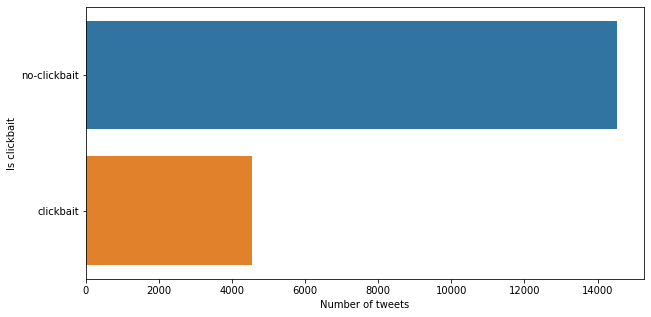

In [ ]:
# Class distribution (train dataset)
print(train_data['truthClass'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(y='truthClass', data = train_data)
plt.ylabel("Is clickbait")
plt.xlabel("Number of tweets")
plt.show()

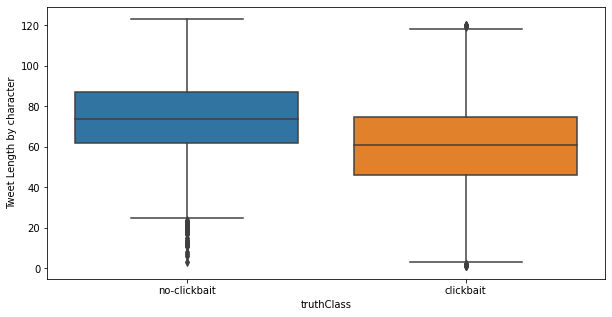

In [ ]:
# Tweet length by characters (train dataset)
plt.figure(figsize=(10,5))
char_len = train_data['postText'].str.len()
sns.boxplot(x="truthClass", y=char_len, data=train_data)
plt.ylabel("Is clickbait")
plt.ylabel("Tweet Length by character")
plt.show()

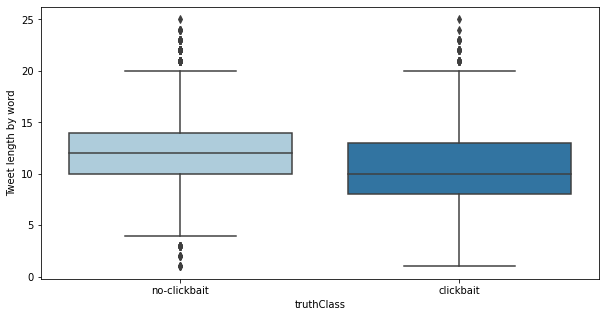

In [ ]:
#Visualizing tweet length by words (train dataset)
plt.figure(figsize=(10,5))
word_len = train_data['postText'].str.split().map(lambda x : len(x))
sns.boxplot(x="truthClass", y=word_len, data=train_data, palette="Paired")
plt.ylabel("Is clickbait")
plt.ylabel("Tweet length by word")
plt.show()

In [ ]:
# word_count
train_data['word_count'] = train_data['postText'].apply(lambda x: len(str(x).split()))
test_data['word_count'] = test_data['postText'].apply(lambda x: len(str(x).split()))

# unique_word_count
train_data['unique_word_count'] = train_data['postText'].apply(lambda x: len(set(str(x).split())))
test_data['unique_word_count'] = test_data['postText'].apply(lambda x: len(set(str(x).split())))

# url_count
train_data['url_count'] = train_data['postText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test_data['url_count'] = test_data['postText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train_data['mean_word_length'] = train_data['postText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_data['mean_word_length'] = test_data['postText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train_data['char_count'] = train_data['postText'].apply(lambda x: len(str(x)))
test_data['char_count'] = test_data['postText'].apply(lambda x: len(str(x)))

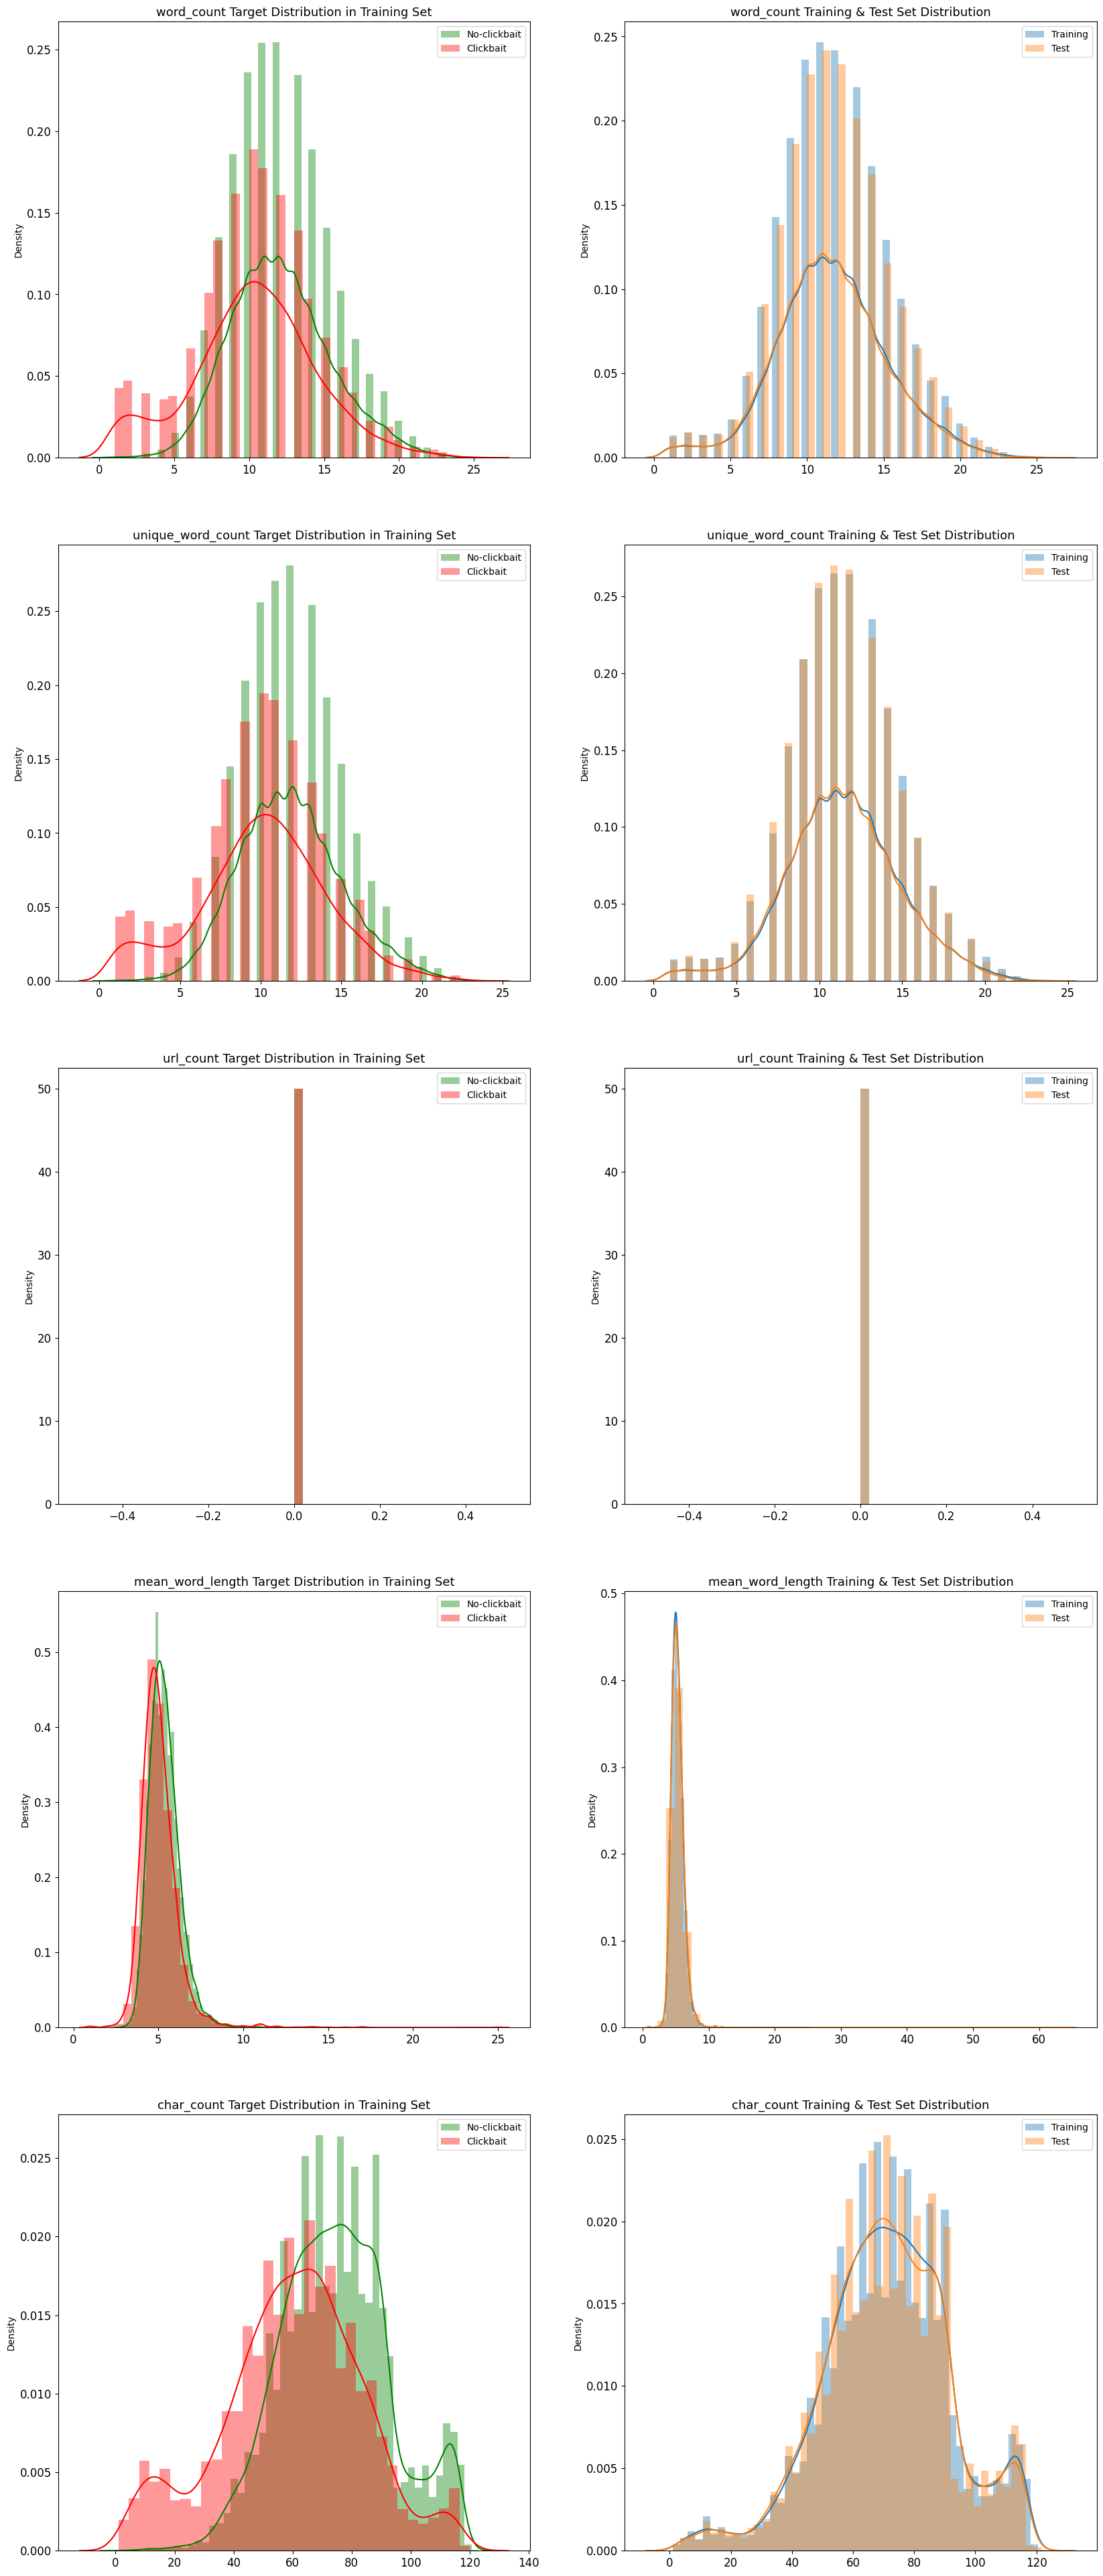

In [ ]:
METAFEATURES = ['word_count', 'unique_word_count', 'url_count', 'mean_word_length', 'char_count']
CLICKBAIT_TWEETS = train_data['truthClass'] == 'clickbait'

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(train_data.loc[~CLICKBAIT_TWEETS][feature], label='No-clickbait', ax=axes[i][0], color='green')
    sns.distplot(train_data.loc[CLICKBAIT_TWEETS][feature], label='Clickbait', ax=axes[i][0], color='red')

    sns.distplot(train_data[feature], label='Training', ax=axes[i][1])
    sns.distplot(test_data[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

## Primeras conclusiones

En primer lugar, cabe destacacar el **pequeño número de entradas nulas y duplicadas**. Esto hace pensar que el dataset ya se encuentra limpio y que no hace falta procesarlo en este sentido. Por otro lado, dada la naturaleza del modelo a emplear, tampoco será necesario procesar los textos (quitando stopwords, emojis o abreviaturas) para así tratar de **conservar el contexto y que el lenguaje sea lo más natural posible**.

Volviendo a los dataset de los que partimos y fijándonos en los gráficos creados, la primera conclusión a la que se llega es la **desigualdad en la proporción de las clases**: Alrededor de un 75% de los componentes del dataset de entrenamiento se corresponden a tweets clasificados como 'no-clickbait' y un 25% a los clasificados como 'clickbait'. La conclusión que sacamos sobre esto es que hasta un modelo en el que siempre se devuelva 'no-clickbait' tendría una precisión del 75%. Es por ello que se **tratará de preservar esta proporción** al crear el split de validación y **no usar técnicas de over-sampling** aunque a priori pueda parecer una buena idea.

En cuanto al resto de figuras, se puede observar como existe una **distribución muy balanceada** entre los datasets de entrenamiento y test respecto al número de palabras y número de caracteres, número de palabras únicas y número de URLs.

En cuanto a la distribusión de dichos indicadores respecto a las clases 'clickbait' y 'no-clickbait', vemos cómo si existe una diferencia algo más notable: **El número de palabras y caracteres, así como el número de palabras únicas es mayor en los casos etiquetados como 'no-clickbait'**.

---

# Data preparation

Como ya se ha comentado, no será necesario procesar los textos excesivamente. En este caso únicamente se va a crear el campo **text** que va a contener el texto en minúsculas (ya que el modelo utilizado está optimizado para este tipo de inputs, se van a eliminar algunos signus de puntuación y carácteres como saltos de linea y se van a preparar los splits de entrenamiento, validación y test:

In [ ]:
# train
train_data['text'] = train_data['postText']
train_data['text'] = train_data["text"].apply(lambda x: x.lower())
train_data = train_data.replace(r'\r+|\n+|\t+','', regex=True) # remove \n, \r and \t
train_data = train_data.replace(r'\\+\|+\'+\"+','', regex=True) # remove unwanted punctuation
train_data['truthClass'] = train_data['truthClass'].map({'clickbait': 1, 'no-clickbait': 0})

# test
test_data['text'] = test_data['postText']
test_data['text'] = test_data["text"].apply(lambda x: x.lower())
test_data = test_data.replace(r'\r+|\n+|\t+','', regex=True) # remove \n, \r and \t
test_data = test_data.replace(r'\\+\|+\'+\"+','', regex=True) # remove unwanted punctuation
test_data['truthClass'] = test_data['truthClass'].map({'clickbait': 1, 'no-clickbait': 0})

Para preparar los splits de entrenamiento, test y validación, se va a utilizar la función train_test_split de sklearn usando la opción stratify sobre el campo truthClass para conservar la proporción de clases.

Un tercio del dataset de entrenamiento pasará a ser el split de validación. El resto constituirá el split de entrenamiento y por último el dataset de test será integramente el split de test.

In [ ]:
train_text, val_text, train_labels, val_labels = train_test_split(train_data.text, train_data.truthClass, random_state=42, test_size=0.33, stratify=train_data.truthClass)
test_text = test_data.text
test_labels = test_data.truthClass

---
# Baselines

## LSTM Baseline

Comenzamos por tokenizar el texto con la librería de Keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
bl_train_text = train_text.copy()
bl_train_labels = train_labels.copy()

bl_val_text = val_text.copy()
bl_val_labels = val_labels.copy()

In [ ]:
vocab_size = 5000
maxlen = 500
embedding_size = 32

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(bl_train_text)

bl_train_text = tokenizer.texts_to_sequences(bl_train_text)
bl_val_text = tokenizer.texts_to_sequences(val_text)

bl_train_text = pad_sequences(bl_train_text, maxlen=maxlen)
bl_val_text = pad_sequences(bl_val_text, maxlen=maxlen)

### LSTM model definition

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 500, 32)           8320      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
__________________________________________________

In [ ]:
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=3,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='lstm_bl_weights.h5',
        monitor='val_accuracy', 
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )
]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_bl_history = model.fit(bl_train_text, bl_train_labels, batch_size=512, validation_data=(bl_val_text, bl_val_labels), epochs=20, callbacks=callbacks)

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.6296 - accuracy: 0.7417
Epoch 1: val_accuracy improved from -inf to 0.76251, saving model to lstm_bl_weights.h5
25/25 [==============================] - 34s 1s/step - loss: 0.6296 - accuracy: 0.7417 - val_loss: 0.5476 - val_accuracy: 0.7625
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.5539 - accuracy: 0.7624
Epoch 2: val_accuracy did not improve from 0.76251
25/25 [==============================] - 23s 924ms/step - loss: 0.5539 - accuracy: 0.7624 - val_loss: 0.5472 - val_accuracy: 0.7625
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.5476 - accuracy: 0.7624
Epoch 3: val_accuracy did not improve from 0.76251
25/25 [==============================] - 24s 957ms/step - loss: 0.5476 - accuracy: 0.7624 - val_loss: 0.5420 - val_accuracy: 0.7625
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.7624
Epoch 4: val_accuracy did not improve fro

In [ ]:
model.load_weights('lstm_bl_weights.h5')
model.save('lstm_bl_model')

INFO:tensorflow:Assets written to: lstm_bl_model/assets


INFO:tensorflow:Assets written to: lstm_bl_model/assets


In [ ]:
bl_test_text = test_text.copy()
bl_test_labels = test_labels.copy()

bl_test_text = tokenizer.texts_to_sequences(bl_test_text)
bl_test_text = pad_sequences(bl_test_text, maxlen=maxlen)

<Figure size 432x288 with 0 Axes>

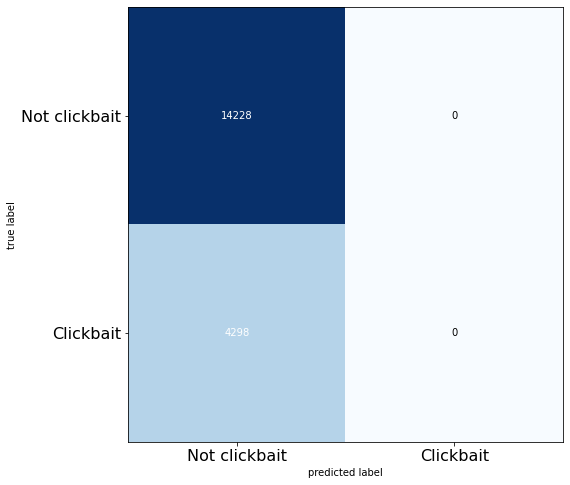

In [ ]:
lstm_preds = [round(i[0]) for i in model.predict(bl_test_text)]
cm = confusion_matrix(bl_test_labels, lstm_preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.yticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.show()

Como se puede observar, el modelo ha aprendido ha devolver siempre 0, es decir, identificar todos los textos como 'no-clickbait'. Esto es explicable debido a desbalance entre clases al que se ha hehco referencia anteriormente.

Dado que en este caso este modelo es simplemente un baseline no se va a modificar para tratar de modificarse. Sin embargo nos sirve para ver que la precisión no será una buena métrica para este caso concreto.

## Other baselines

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
clf = knn.fit(bl_train_text, bl_train_labels)
y_pred = clf.predict(bl_test_text)
acc_knb_model=roc_auc_score(bl_test_labels, y_pred)*100
acc_knb_model

56.048141331369614

In [ ]:
lr = LogisticRegression(C = 0.2)
clf1 = lr.fit(bl_train_text, bl_train_labels)
y_pred1 = clf1.predict(bl_test_text)
acc_log_reg=roc_auc_score(bl_test_labels, y_pred1)*100
acc_log_reg

50.01030057196546

In [ ]:
clf2 = GaussianNB().fit(bl_train_text, bl_train_labels)
y_pred2 = clf2.predict(bl_test_text)
acc_nb=roc_auc_score(bl_test_labels, y_pred2)*100
acc_nb

55.95976801653273

In [ ]:
clf3 = tree.DecisionTreeClassifier().fit(bl_train_text, bl_train_labels)
y_pred3 = clf3.predict(bl_test_text)
acc_dt=roc_auc_score(bl_test_labels, y_pred3)*100
acc_dt

56.51489509474956

In [ ]:
clf4 = RandomForestClassifier(max_depth=5, random_state=0).fit(bl_train_text, bl_train_labels)
y_pred4 = clf4.predict(bl_test_text)
acc_rmf_model=roc_auc_score(bl_test_labels, y_pred4)*100
acc_rmf_model

53.54380230332498

In [ ]:
sgd_model=SGDClassifier()
sgd_model.fit(bl_train_text,bl_train_labels)
sgd_pred=sgd_model.predict(bl_test_text)
acc_sgd=round(sgd_model.score(bl_train_text,bl_train_labels)*100,10)
acc_sgd

74.5539906103

In [ ]:
xgb_model=XGBClassifier()
xgb_model.fit(bl_train_text,bl_train_labels)
xgb_pred=xgb_model.predict(bl_test_text)
acc_xgb=round(xgb_model.score(bl_train_text,bl_train_labels)*100,10)
acc_xgb

78.2316118936

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(bl_train_text,bl_train_labels)
lgbm_pred=lgbm.predict(bl_test_text)
acc_lgbm=round(lgbm.score(bl_train_text,bl_train_labels)*100,10)
acc_lgbm

83.5524256651

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(bl_train_text,bl_train_labels)
regr_pred=regr.predict(bl_test_text)
acc_regr=round(regr.score(bl_train_text,bl_train_labels)*100,10)
acc_regr

0.8023273118

In [ ]:
clf5 = SVC(gamma='auto').fit(bl_train_text, bl_train_labels)
y_pred5 = clf5.predict(bl_test_text)
acc_svm_model=roc_auc_score(bl_test_labels, y_pred5)*100
acc_svm_model

53.08683073100669

In [ ]:
bl_results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent','Linear Regression','Naive Bayes','XGBoost','LightGBM','Decision Tree'],
    'Score': [acc_svm_model, acc_knb_model, acc_log_reg, 
              acc_rmf_model,acc_sgd,acc_regr,acc_nb,acc_xgb,acc_lgbm,acc_dt]})
bl_result_df = bl_results.sort_values(by='Score', ascending=False)
bl_result_df = bl_result_df.set_index('Score')
bl_result_df

,Model
Score,
83.552426,LightGBM
78.231612,XGBoost
74.553991,Stochastic Gradient Decent
56.514895,Decision Tree
56.048141,KNN
55.959768,Naive Bayes
53.543802,Random Forest
53.086831,Support Vector Machines
50.010301,Logistic Regression


En la tabla anterior se pueden ver los resultados de otros modelos predictivos que servirán como baseline a parte del modelo anterior basado en LSTM.

---
# BERT based model

In [ ]:
!pip install transformers
from transformers import RobertaModel, RobertaTokenizer

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb=512 # Helps prevent Out of CUDA Memory

# specify GPU
device = torch.device("cuda")

     |████████████████████████████████| 4.0 MB 17.8 MB/s 
     |████████████████████████████████| 6.5 MB 46.3 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
     |████████████████████████████████| 77 kB 7.8 MB/s 
     |████████████████████████████████| 895 kB 43.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
train_text = train_text.copy()
train_labels = train_labels.copy()

val_text = val_text.copy()
val_labels = val_labels.copy()

In [ ]:
bert = RobertaModel.from_pretrained("roberta-base")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

### Tokenization

In [ ]:
sample_texts = ["you won't believe what newtral interviews are like!", "we will fine-tune a bert model"]
sample = tokenizer.batch_encode_plus(sample_texts, padding=True, return_token_type_ids=False) # encode text
print('Bert tokenization sample:')
print(sample)

Bert tokenization sample:
{'input_ids': [[0, 6968, 351, 75, 679, 99, 92, 90, 7085, 5533, 32, 101, 328, 2], [0, 1694, 40, 2051, 12, 90, 4438, 10, 741, 2399, 1421, 2, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]}


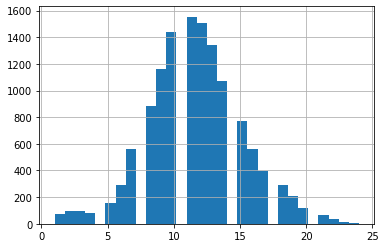

In [ ]:
# get length of all the messages in the train set
seq_len = [len(str(i).split()) for i in train_text]
pd.Series(seq_len).hist(bins = 30)

Gracias al grafico anterior nos podemos hacer una idea de la distribución de la lingtud de las entradas en el split de entrenamiento. Esto nos servirá para elegir el valor máximo de la longitud de secuencias.

In [ ]:
MAX_SEQ_LEN = 15

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_SEQ_LEN,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_SEQ_LEN,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_SEQ_LEN,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

### Convert Integer Sequences to Tensors

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

### Dataloaders

In [ ]:
#define a batch size
batch_size = 4

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

## Model Architecture

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert 
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      # relu activation function
      self.relu =  nn.ReLU()
      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)
      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
      #pass the inputs to the model
    #   _, cls_hs = self.bert(sent_id, attention_mask=mask)
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc2(x)
      # apply softmax activation
      x = self.softmax(x)
      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# adamW optimizer from huggingface
# https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.AdamW
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-4)

### Find Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight = 'balanced', classes = np.unique(train_labels), y = train_labels)

print(class_wts)

[0.65578818 2.10474308]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 6

## Fine-Tuning

In [ ]:
# function to train the model
def train():
  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 150 batches.
    if step % 150 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
    sent_id, mask, labels = batch

    model.zero_grad()
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    preds=preds.detach().cpu().numpy()
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 150 batches.
    if step % 150 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
    #   elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

## Model training

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 6
  Batch   150  of  3,195.
  Batch   300  of  3,195.
  Batch   450  of  3,195.
  Batch   600  of  3,195.
  Batch   750  of  3,195.
  Batch   900  of  3,195.
  Batch 1,050  of  3,195.
  Batch 1,200  of  3,195.
  Batch 1,350  of  3,195.
  Batch 1,500  of  3,195.
  Batch 1,650  of  3,195.
  Batch 1,800  of  3,195.
  Batch 1,950  of  3,195.
  Batch 2,100  of  3,195.
  Batch 2,250  of  3,195.
  Batch 2,400  of  3,195.
  Batch 2,550  of  3,195.
  Batch 2,700  of  3,195.
  Batch 2,850  of  3,195.
  Batch 3,000  of  3,195.
  Batch 3,150  of  3,195.

Evaluating...
  Batch   150  of  1,574.
  Batch   300  of  1,574.
  Batch   450  of  1,574.
  Batch   600  of  1,574.
  Batch   750  of  1,574.
  Batch   900  of  1,574.
  Batch 1,050  of  1,574.
  Batch 1,200  of  1,574.
  Batch 1,350  of  1,574.
  Batch 1,500  of  1,574.

Training Loss: 0.680
Validation Loss: 0.664

 Epoch 2 / 6
  Batch   150  of  3,195.
  Batch   300  of  3,195.
  Batch   450  of  3,195.
  Batch   600  of  3,195.
  

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

#### Descripción del modelo

El modelo utilizado ha sido [**RoBERTa**](https://huggingface.co/docs/transformers/model_doc/roberta), modelo basado en BERT que modifica los hiperparámetros clave y comparte su implementación y arquitectura.

Parámetros utilizados:

*   **Batch size**: 8 — Se ha decidido usar un número reducido para paliar un problema de memoria CUDA en Google Colab. El modelo se habría visto beneficiado de un Batch size mayor ya que para cada segmento utilizaría mas casos.
*   **Number of epochs**: 6 — Número reducido de epochs por la misma razón anterior: Tratar de usar menos memoria de la GPU. En el propio log del entrenamiento del modelo se puede ver claramente cómo el training y validation loss sigue disminuyendo. El modelo se vería beneficiado por un mayor número de epochs.
*   **Learning rate**: 1e-4 — Valor habitual para este tipo de modelos.
*   **Optimizador**: AdamW — Implementación alternativa del algoritmo Adam ([huggingface](https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.AdamW))



## Get Predictions for Test Data

In [ ]:
torch.cuda.empty_cache()

In [ ]:
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
from sklearn.metrics import classification_report
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14228
           1       0.68      0.48      0.56      4298

    accuracy                           0.83     18526
   macro avg       0.77      0.71      0.73     18526
weighted avg       0.82      0.83      0.82     18526



<Figure size 432x288 with 0 Axes>

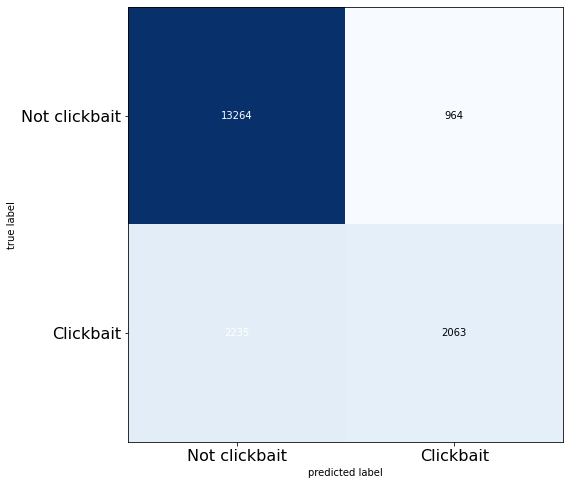

In [ ]:
cm = confusion_matrix(test_y, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.yticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.show()

#### Interpretación de los resultados

En primer lugar podemos ver como **la precisión alcanza un 83%**, sin embargo ya se ha comentado que esta métrica no es la mas adecuada para un conjunto de datos tan desbalanceado. Comparándolo con la *baselines* propuestas y teniendo en cuenta que el modelo ha sido creado y entrenado con algunos parámetros lejanos a los ideales para tratar de ajustarse a la memoria CUDA de la GPU, el resultado es **el mejor de todos los evaluados**.

En este sentido, como métrica mas adecuada para este caso, tenemos el valor-F o *f1-score*. Esta métrica sale de combinar la precisión y el *recall* en un solo valor.

Por otro lado, y de forma más gráfica, en la matriz de confusión mostrada más arriba podemos identificar el número de casos clasificados correctamente y el número de falsos positivos y falsos negativos.

Tal y como era esperado, el mayor número de predicciones correctas se encuentran en los casos etiquetados como 'No-Clickbait' (13264). Junto con el alto número de falsos negativos (2235), esto nos indica que el modelo tiende a etiquetar los inputs como 'No-Clickbait'. Esto ya hemos visto que pasaba en el baseline propuesto basado en la red recurrente LSTM, auque en este caso de forma menos agresiva.

Para los textos cuyas predicciones han resultado ser 'Clickbait', tenemos que 2063 han sido de forma correcta y 964 han sido falsos positivos.

En el apartado siguiente se tratará de analizar ambos tipos de errores.

--- 
# Análisis de errores

In [ ]:
test_df = test_data.copy()

In [ ]:
test_df['pred'] = preds

In [ ]:
test_df

,postText,truthClass,text,pred
0,Johnny Manziel on Browns' No. 1 pick Myles Gar...,0,johnny manziel on browns' no. 1 pick myles gar...,0
1,Fabio: California Is a 'Mess' Because of Liber...,0,fabio: california is a 'mess' because of liber...,0
2,"""He's been huge for us this year, man.""",1,"""he's been huge for us this year, man.""",0
3,New Bears quarterback Mitchell Trubisky was gr...,0,new bears quarterback mitchell trubisky was gr...,0
4,It's not enough to let employees work flexible...,0,it's not enough to let employees work flexible...,1
...,...,...,...,...
18974,Whitney Tilson on Trump's supporters: 'I think...,0,whitney tilson on trump's supporters: 'i think...,0
18975,The McDonald’s franchisee who created the Big ...,0,the mcdonald’s franchisee who created the big ...,0
18976,Colombian Congress passes second #FARC peace d...,0,colombian congress passes second #farc peace d...,0
18977,Australian startups need more diversity to thr...,0,australian startups need more diversity to thr...,0


In [ ]:
false_positives = test_df[((test_df['truthClass'] == 0) & (test_df['pred'] == 1))]
false_negatives = test_df[((test_df['truthClass'] == 1) & (test_df['pred'] == 0))]

In [ ]:
# print 5 random false positive entries:
for i in false_positives[['postText']].sample(5).values:
    print(i[0])

"Be all you can be. Be fearless my child, be free." - @FarOutAkhtar
This map shows the huge surge in "deaths of despair" since the year 2000
How sudden drop in temperature makes you sick
Get ready for pre-roll ads on Periscope
"No one is going to pay you what you deserve if you don’t believe in your value."


En cuanto a los **falsos positivos**, es decir, textos que el modelo ha clasificado como 'Clickbait' pero que estaban etiquetadas como 'No Clickbait', me parece identificar los siguientes patrones:

*   Textos con citas entre comillas
*   Frases escritas en imperativo
*   Frases que están formuladas como una pregunta sin serlo

Sin contexto, creo que algunas de estas frases podrían ser mal clasificadas incluso por una persona. Por lo tanto la conclusión al evaluar este tipo de errores es que el modelo podría beneficiarse de otros inputs que puedan ofrecer más contexto como podrían ser títulos, keywords o resúmenes de los artículos a los que se refiere el tweet.





In [ ]:
# print 5 random false negative entries:
for i in false_negatives[['postText']].sample(5).values:
    print(i[0])

The secret of Namibia's 'fairy circles' may be explained at last
Hamara Bajaj... #Nostalgia
The victim was asked to 'fulfil her duty as a wife'#Shameful
100 years of French beauty in just two minutes
Bernice King has a powerful message for Pepsi


Por otro lado, respecto a los falsos negativos (textos clasificados como 'No-Clickbait' que originalmente estaban etiquetdos como 'Clickbait') se me ocurren los siguientes posibles patrones:

*   Como en los falsos negativos, el uso de comillas dentro del texto
*   El uso de #Hashtags

En estos casos concretos, me parece que manualmente si podría ser posible identificarlos como Clickbait con mayor facilidad. Sin embargo, no me es posible explicar fácilmente el por qué.

Está claro que un clickbait habla de 'algo' sin explicar la parte que incita curiosidad, pero en los casos propuestos se hace dificil diferenciar este comportamiento.

En definitiva, y de la misma forma que para los falsos negativos, el contexto podría ayudar ya que según el tema tratado será más facil caer en el clickbait o no. Por ejemplo temas mas propicios a generar clickbaits serían la política o cotilleos, y por otro lado temas como noticias científicas, tecnología o historia son, en mi opinión, menos sugerentes en este sentido.
